In [1]:
import pandas as pd
import sklearn as sk
import imblearn as im
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
diabetes_data = pd.read_csv("C:\\Users\\Austen Couvertier\\OneDrive\\Desktop\\Coding_Projects\\phase_1_quant_foundations\\diabetes.csv")

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_data.shape

(768, 9)

In [ ]:
diabetes_data.isnull().sum() #Summed all falses which are 0s

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
class_counts = diabetes_data['Outcome'].value_counts()
class_counts

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: title={'center': 'Class Counts'}, xlabel='Outcome'>

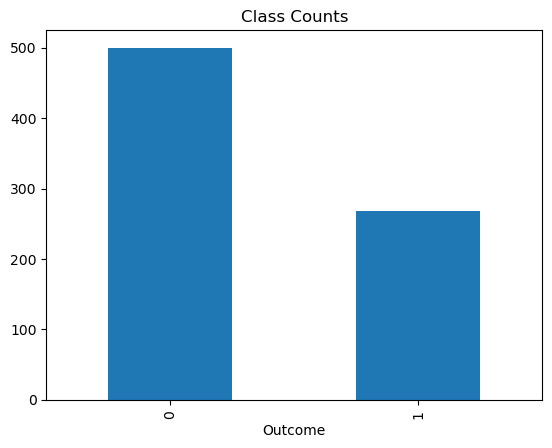

In [ ]:
class_counts.plot(kind='bar',title='Class Counts')

In [ ]:
#SMOTE: Synthetic Minority Over-sampling Technique
y = diabetes_data['Outcome']
X = diabetes_data.drop(columns=['Outcome'])


In [ ]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
scaler = sk.preprocessing.StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
smote = im.over_sampling.SMOTE(random_state=42)

In [ ]:
x_train_smote, y_train_smote = smote.fit_resample(X_train_scaled,y_train)

In [ ]:
y_train.value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

In [ ]:
y_train_smote.value_counts()

Outcome
0    400
1    400
Name: count, dtype: int64

In [ ]:
model_original = sk.linear_model.LogisticRegression(solver='liblinear',max_iter=200)
model_smote = sk.linear_model.LogisticRegression(solver='liblinear',max_iter=200)

In [ ]:
model_original.fit(X_train_scaled,y_train)
model_smote.fit(x_train_smote,y_train_smote)

LogisticRegression(max_iter=200, solver='liblinear')

In [ ]:
y_prob_orig = model_original.predict_proba(X_test_scaled)[:,1]
y_prob_smote = model_smote.predict_proba(X_test_scaled)[:,1]

In [ ]:
# Plot ROC curves
fpr_orig, tpr_orig, _ = sk.metrics.roc_curve(y_test, y_prob_orig)
fpr_smote, tpr_smote, _ = sk.metrics.roc_curve(y_test, y_prob_smote)

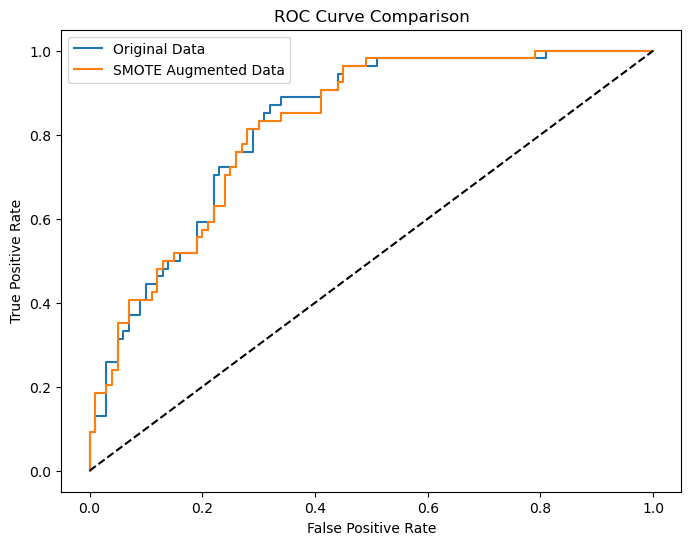

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_orig, tpr_orig, label='Original Data')
plt.plot(fpr_smote, tpr_smote, label='SMOTE Augmented Data')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()